In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## Chernoff Bound ##

If the form of a distribution is intractable in that it is difficult to find exact probabilities by integration, then good estimates and bounds become important. Bounds on the tails of the distribution of a random variable help us quantify roughly how close to the mean the random variable is likely to be. 

We already know two such bounds. Let $X$ be a random variable with expectation $\mu$ and SD $\sigma$.

#### Markov's Bound on the Right Hand Tail ####
If $X$ is non-negative, 

$$
P(X \ge c) ~  \le ~ \frac{\mu}{c}
$$

This bound depends only on the first moment of $X$ (and the fact that $X$ is non-negative).

#### Chebychev's Bound on Two Tails ####

$$
P(\lvert X - \mu\rvert \ge c) ~ \le ~ \frac{\sigma^2}{c^2}
$$

This bound depends on the first and second moments of $X$ since $\sigma^2 = E(X^2) - (E(X))^2$. 

In cases where both bounds apply, Chebyshev often does better than Markov because it uses two moments instead of one. So it is reasonable to think that the more moments you know, the closer you can get to the tail probabilities. 

Moment generating functions can help get good bounds on tail probabilities. In what follows, we will assume that the moment generating function of $X$ is finite over the whole real line. If it is finite only over a smaller interval around 0, the calculations of the mgf below should be confined to that interval.

In [2]:
# VIDEO
from IPython.display import YouTubeVideo

YouTubeVideo('HCEQFjHyLIw')

### Exponential Bounds on Tails ###

Let $X$ be a random variable with mgf $M_X$. We are going to find an upper bound for the right hand tail probability $P(X \ge c)$ for a fixed $c$.

To see how the moment generating function comes in, fix $t > 0$. The function defined by $g(x) = e^{tx}$ is increasing as well as non-negative. Because it is increasing,

$$
X \ge c ~ \iff ~ e^{tX} \ge e^{tc}
$$

Since $e^{tX}$ is a non-negative random variable, we can apply Markov's inequality as follows. 

$$
\begin{align*}
P(X \ge c) ~ &= P(e^{tX} \ge e^{tc}) \\
&\le ~ \frac{E(e^{tX})}{e^{tc}} ~~~~ \text{(Markov's bound)} \\
&= ~ \frac{M_X(t)}{e^{tc}} \\
&=~ M_X(t)e^{-tc}
\end{align*}
$$

Since $t$ is fixed, $M_X(t)$ is constant. So we have shown that $P(X \ge c)$ is falling exponentially as a function of $c$.

### Chernoff Bound on the Right Tail ###

The calculation above is the first step in developing a [Chernoff bound](https://en.wikipedia.org/wiki/Chernoff_bound) on the right hand tail probability $P(X \ge c)$ for a fixed $c$.

For the next step, notice that you can choose $t$ to be any positive number. For our fixed $c$, some choices of $t$ will give sharper upper bounds than others. The sharpest among all of the bounds will correspond to the value of $t$ that minimizes the right hand side. So the Chernoff bound has an *optimized* form:

$$
P(X \ge c) ~ \le ~ \min_{t > 0} M_X(t)e^{-tc}
$$

### Application to the Normal Distribution ###

Suppose $X$ has the normal $(\mu, \sigma^2)$ distribution and we want to get a sense of how far $X$ can be above the mean. Fix $c > 0$. The exact chance that the value of $X$ is at least $c$ above the mean is

$$
P(X - \mu \ge c) ~ = ~ 1 - \Phi(c/\sigma)
$$

because the distribution of $X - \mu$ is normal $(0, \sigma^2)$. This exact answer looks neat and tidy, but the standard normal cdf $\Phi$ is not easy to work with analytically. Sometimes we can gain more insight from a good bound.

The optimized Chernoff bound is

$$
\begin{align*}
P(X- \mu \ge c) ~ &\le ~ \min_{t > 0} M_{X-\mu}(t)e^{-tc} \\ \\
&= ~ \min_{t > 0} e^{\sigma^2t^2/2} \cdot e^{-tc} \\ \\
&= ~ \min_{t > 0} e^{-ct + \sigma^2t^2/2}
\end{align*}
$$

The curve below is the graph of $\exp(-ct + \sigma^2t^2/2)$ as a function of $t$, in the case $\sigma = 2$ and $c = 5$. The flat line is the exact probability of $P(X - \mu \ge c)$. The curve is always above the flat line: no matter what $t$ is, the bound is an upper bound. The sharpest of all the upper bounds corresponds to the minimizing value $t^*$ which is somewhere in the 1.2 to 1.3 range.

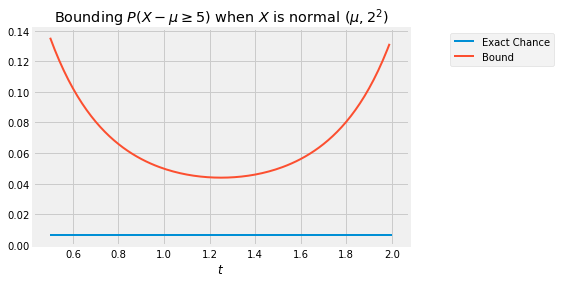

In [3]:
# NO CODE
c = 5
sigma = 2
t_min = 0.5
t_max = 2
t = np.arange(t_min, t_max, 0.01)
bound = np.exp(-1*c*t + 0.5*((sigma*t)**2))
exact = 1 - stats.norm.cdf(2.5)
plt.plot([t_min, t_max], [exact, exact], lw=2, label = 'Exact Chance')
plt.plot(t, bound, lw=2, label = 'Bound')
plt.legend(bbox_to_anchor=(1.4, 1))
plt.xlabel('$t$')
plt.title('Bounding $P(X - \mu \geq 5)$ when $X$ is normal $(\mu, 2^2)$');

To find the minimizing value of $t$ analytically, we will use the standard calculus method of minimization. But first we will simplify our calculations by observing that finding the point at which a positive function is minimized is the same as finding the point at which the log of the function is minimized. This is because $\log$ is an increasing function.

So the problem reduces to finding the value of $t$ that minimizes the function $h(t) = -ct + \sigma^2t^2/2$. By differentiation, the minimizing value of $t$ solves

$$
c = \sigma^2 t^*
$$

and hence

$$
t^* = \frac{c}{\sigma^2}
$$

So the Chernoff bound is 

$$
P(X - \mu \ge c) \le e^{-ct^* + \sigma^2{t^*}^2/2} = e^{-c^2/2\sigma^2}
$$

Compare this with the bounds we already have. Markov's bound can't be applied directly as $X - \mu$ can have negative values. Because the distribution of $X - \mu$ is symmetric about 0, Chebychev's bound becomes

$$
P(X - \mu \ge c ) \le \frac{\sigma^2}{2c^2}
$$

When $c$ is large, the optimized Chernoff bound is quite a bit sharper than Chebychev's. In the case $\sigma = 2$, the graph below shows the exact value of $P(X - \mu \ge c)$ as a function of $c$, along with the Chernoff and Chebychev bounds.

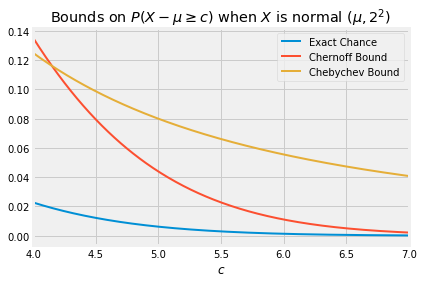

In [4]:
# NO CODE
sigma = 2
c_min = 4
c_max = 7
c = np.arange(c_min, c_max + .01, 0.01)
chernoff = np.exp(-0.5*((c/sigma)**2))
chebychev = 0.5 * ((sigma/c)**2)
plt.plot(c, 1 - stats.norm.cdf(c/sigma), label='Exact Chance', lw=2)
plt.plot(c, chernoff, lw=2, label='Chernoff Bound')
plt.plot(c, chebychev, lw=2, label='Chebychev Bound')
plt.xlim(c_min, c_max)
plt.xlabel('$c$')
plt.legend()
plt.title('Bounds on $P(X - \mu \geq c)$ when $X$ is normal $(\mu, 2^2)$');

### Chernoff Bound on the Left Tail ###
By an analogous argument we can derive a Chernoff bound on the left tail of a distribution. For a fixed $t > 0$, the function $g(x) = e^{-tx}$ is decreasing and non-negative. So for $t > 0$ and any fixed $c$,

$$
P(X \le c) = P(e^{-tX} \ge e^{-tc}) \le \frac{E(e^{-tX})}{e^{-tc}} = \frac{M_X(-t)}{e^{-tc}}
$$

and therefore

$$
P(X \le c) \le \min_{t > 0} \frac{M_X(-t)}{e^{-tc}}
$$

### Sums of Independent Random Variables ###
The Chernoff bound is often applied to sums of independent random variables. Let $X_1, X_2, \ldots, X_n$ be independent and let $S_n = X_1 + X_2 + \ldots + X_n$. Fix any number $c$. For every $t > 0$,

$$
P(S_n \ge c) \le \frac{M_{S_n}(t)}{e^{tc}} = \frac{\prod_{i=1}^n M_{X_i}(t)}{e^{tc}}
$$

This result is useful for finding bounds on binomial tails because the moment generating function of a Bernoulli random variable has a straightforward form. It is also used for bounding tails of sums of independent indicators with possibly different success probabilities. We will leave all this for a subsequent course.